# Single Parent Population
## Fourth Try
### 99/09/04

Plotting standard deviation of populations doesn't matter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Poisson distribution for number of childeren
The distrbution is discrete. It has been used for this purpose and its only parameter $\lambda$ makes sense!

In [2]:
#Poisson distribution assumption

def poisson_next_gen(n, lam):
    n_next  = 0
    inf_num = 0

    for i in range(n):
        inf_num = int(np.random.poisson(lam, 1))
        n_next += inf_num
        #need to assume logic range
#         if inf_num < 10:
#             n_next +=inf_num
    return n_next

### Standard deviation of the population

Wall time: 22.8 s


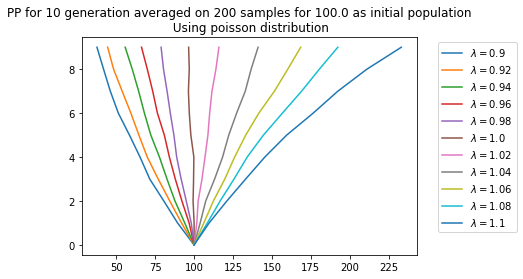

In [3]:
%%time

lam_mat = np.arange(0.9, 1.1, 0.02)

 

for lam in lam_mat:
    generation   = 10
    time    = np.arange(generation)
    pop     = np.zeros(generation)
    pop[0]  = 100
    pop_std = np.zeros(generation)

    ave = 200
    ns = np.zeros(ave)


    for t in range((generation-1)):
        for i in range(ave):
            ns[i] = poisson_next_gen(int(pop[t]), lam)
        pop[t+1]     = np.mean(ns)
        pop_std[t+1] = np.std(ns) 

    plt.plot(pop, time, label = '$\lambda = ${}'.format(np.round(lam, 3)))
    plt.title("PP for {} generation averaged on {} samples for {} as initial population \
    \n Using poisson distribution".format(generation, ave, pop[0]))
    
#     plt.plot(pop_std, time, label = f'std for $\lambda$ = {lam}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Wall time: 9.51 s


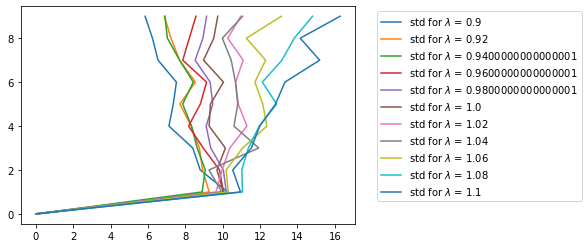

In [5]:
%%time

lam_mat = np.arange(0.9, 1.1, 0.02)

 

for lam in lam_mat:
    generation   = 10
    time    = np.arange(generation)
    pop     = np.zeros(generation)
    pop[0]  = 100
    pop_std = np.zeros(generation)

    ave = 200
    ns = np.zeros(ave)


    for t in range((generation-1)):
        for i in range(ave):
            ns[i] = poisson_next_gen(int(pop[t]), lam)
        pop[t+1]     = np.mean(ns)
        pop_std[t+1] = np.std(ns) 

#     plt.plot(pop, time, label = '$\lambda = ${}'.format(np.round(lam, 3)))
#     plt.title("PP for {} generation averaged on {} samples for {} as initial population \
#     \n Using poisson distribution".format(generation, ave, pop[0]))
    
    plt.plot(pop_std, time, label = f'std for $\lambda$ = {lam}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Wall time: 22.4 s


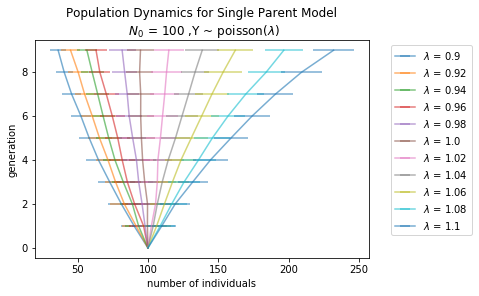

In [6]:
%%time

lam_mat = np.arange(0.9, 1.1, 0.02)

 

for lam in lam_mat:
    generation   = 10
    time    = np.arange(generation)
    pop     = np.zeros(generation)
    pop[0]  = 100
    pop_std = np.zeros(generation)

    ave = 200
    ns = np.zeros(ave)


    for t in range((generation-1)):
        for i in range(ave):
            ns[i] = poisson_next_gen(int(pop[t]), lam)
        pop[t+1]     = np.mean(ns)
        pop_std[t+1] = np.std(ns) 

#     plt.plot(pop, time, label = '$\lambda = ${}'.format(np.round(lam, 3)))
#     plt.title("PP for {} generation averaged on {} samples for {} as initial population \
#     \n Using poisson distribution".format(generation, ave, pop[0]))
    
    plt.errorbar(pop, time, yerr = None, xerr = pop_std, alpha = 0.6 , label = f'$\lambda$ = {np.round(lam, 2)}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Population Dynamics for Single Parent Model\n $N_0$ = 100 ,Y ~ poisson($\lambda$)")
plt.ylabel("generation")
plt.xlabel("number of individuals")
plt.savefig("pp_poisson.png")

### Critical value of $\lambda$ average of children number

In [7]:
#does it extinc?

def extinc(pop_0, lam):
    pop  = []
    time = []
    pop.append(pop_0)
    
    i = 0
    while 1:
        pop.append(poisson_next_gen(pop[i], lam))
        i += 1
        
        if pop[i] < 0.8 * pop[0]:
            return 1
        if pop[i] > 1.2 * pop[0]:
            return 0

In [4]:
#probability of extinction

def ext_prob(pop_0, lam):
    samples = 500
    extinctions = 0
    for s in range(samples):
        extinctions += extinc(pop_0, lam)

    extinction_probability = extinctions / samples

    return extinction_probability

Wall time: 2min 15s


Text(0.5, 0, '$\\lambda$')

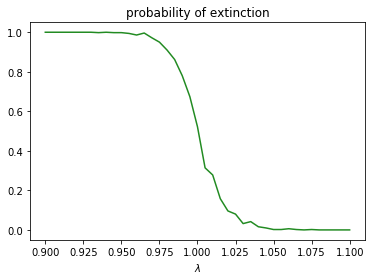

In [13]:
%%time

lam_mat     = np.arange(0.9, 1.1, 0.005)
probability = np.zeros(np.size(lam_mat)) 

pop_0 = 100

for i in range(np.size(lam_mat)):
    probability[i] = ext_prob(pop_0, lam_mat[i])
    
    
plt.plot(lam_mat, probability, c = 'forestgreen')
plt.title("probability of extinction")
plt.xlabel("$\lambda$")


Text(0.5, 0, '$\\lambda$')

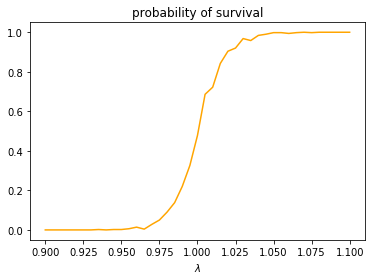

In [14]:
plt.plot(lam_mat, (1 - probability), c = 'orange')
plt.title("probability of survival")
plt.xlabel("$\lambda$")
